**Programming Assignment-1:**

There are 3 question in this assignment. First question is on intrest point detection, the second question is on K-NN Classification and the last question is on HOG feature extraction. All the images needed for the assignment are given in the zip file in google classroom. Please download the zip file and upload in your drive to solve all the questions

# Q.1 Harris Corner Detector 

The task at hand is to find the interest points in the given image using Harris Corner Detector. Download the box.jpg image from the Google Classroom and apply the Harris Corner algorithm for the detecting the corners in the image. The image and the algorithm is as follows.
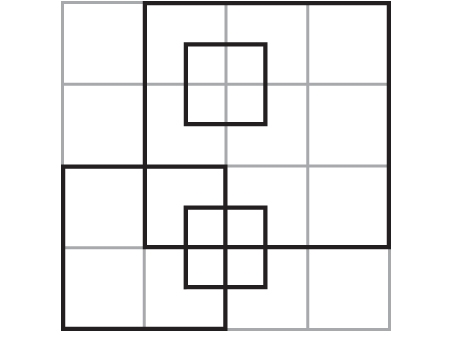



**Algorithm**
1) For the given image convert colour Image to GrayScale image. 
2) Compute the spatial derivatives Ix and Iy using sobel kernels.
3) Compute the structure tensor setup (Elements of Second Moment Matrix denoted as M)
4) Keeping the value of K=0.05, compute the Harris corner response using 
 R=det(M) - k*(trace(M))2
  

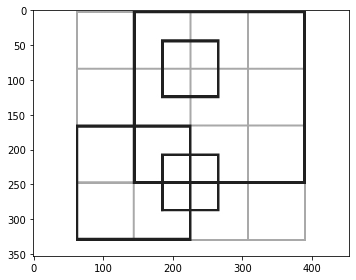

In [1]:
## Import the necessary packages and read the box.jpg image ###
import numpy as np
from skimage.io import imread
from skimage.color import rgb2gray
import skimage.io as sk
from scipy import signal as sig
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt


import cv2
from google.colab.patches import cv2_imshow


# Your code starts here ###
img=imread('/content/box.jpg')
img1=rgb2gray(img)
sk.imshow(img1)

imggray=img1




## Your code ends here ####

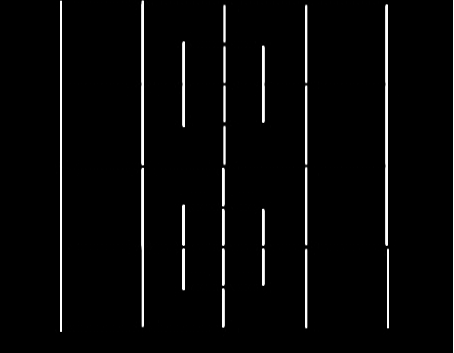

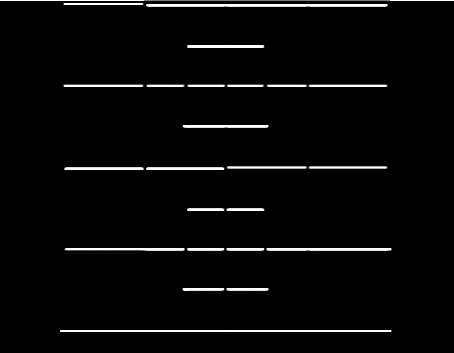

In [2]:
## Define the sobel operator and the convolution operation for computig the gradients Ix and Iy ###

kernel_x = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])

kernel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

### Your code starts here###


I_x=sig.convolve2d(imggray, kernel_x, mode='same')
I_y=sig.convolve2d(imggray, kernel_y, mode='same')

cv2_imshow(I_x*255)
cv2_imshow(I_y*255)



### Your code ends here ###

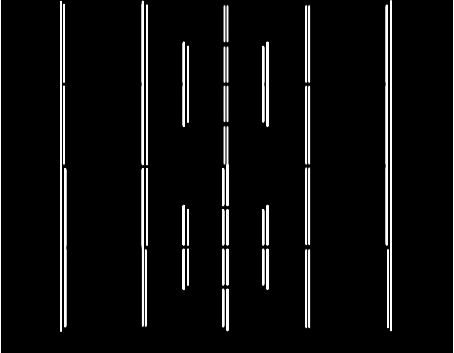

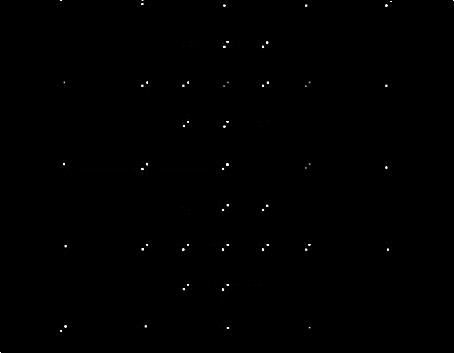

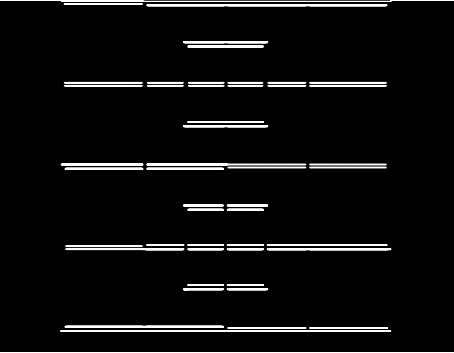

In [3]:
### Compute Ix2, Ix.Iy and Iy2 for every pixel ###

### Your Code starts here ###

I_xx=I_x**2
I_yy=I_y**2
I_xy=I_x*I_y
#I_xy = gaussian_filter(I_xy, sigma=2)

I_yx=I_xy


cv2_imshow(I_xx*255)
cv2_imshow(I_xy*255)
cv2_imshow(I_yy*255)




### Your Code ends here ##

In [4]:
### Keeping the value of K=0.05, compute the cornerness for every pixel. 
### If cornernes value(R) > 0, then it as corner  ###
### If cornernes value(R) < 0, then it as edge  ###
### If cornernes value(R) = 0, then it as edge  ###


### Your Code starts here ####
k = 0.05
# determinant
detA = I_xx * I_yy - I_xy ** 2
# trace
traceA = I_xx + I_yy
R = detA - k * traceA ** 2


thresh=0.0000001

# Create an image copy to draw corners on
R1 = np.copy(R)
ig=img[:,:,0]
# Iterate through all the corners and draw them on the image (if they pass the threshold)
for j in range(0, R.shape[0]):
  for i in range(0, R.shape[1]):
    if(R[j,i] > thresh):
      R1[j,i]=0
    else:
      R1[j,i]=ig[j,i]

# cv2_imshow(R1)




### Your Code ends here ###



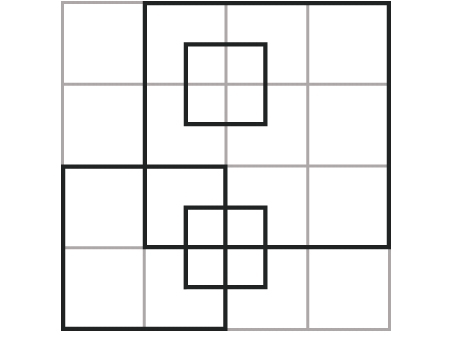

In [5]:
### Retain only the corner pixels and display the image ###

### Your Code starts here ###

y3=np.copy(img)
y3[:,:,1]=R1
cv2_imshow(y3)




### Your Code Ends here ###



**Q.2 K-NN Classification:**
K Nearest Neighbor algorithm falls under the Supervised Learning category and is used for classification (most commonly) and regression. As the name (K Nearest Neighbor) suggests it considers K Nearest Neighbors (Data points) to predict the class or continuous value for the new Datapoint.

Download the CIFAR 10 Dataset from the zip file and experiment with K = 1, 3, 5, 9 and 11 for each of the following tasks.


Compare the above mentioned tasks in terms of Accuracy and observe the variation of accuracy with K. (plot Accuracy vs. K and infer)

CIFAR-10 Dataset

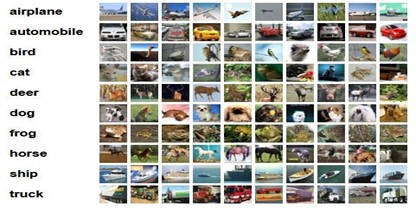




In both training as well as in test data each row stores a 32x32 color image. The first 1024 entries contain the red channel values, the next  1024  the green, and the final 1024 the blue. The image is stored in  row-major order,  so that the first 32 entries of the array are the red channel values of the first row of the image. When you load the training or testing data the corresponding labels will be automatically loaded.

    



In [ ]:
#### Your Code starts here ###

import scipy.io as sc
import pandas as pd
import numpy as np
from scipy.io import loadmat
from scipy.spatial import distance
from collections import Counter
import matplotlib.pyplot as plt



mat1=sc.loadmat('/content/CIFAR10_Train.mat',verify_compressed_data_integrity=False);
v1=list(mat1.values())
k1=list(mat1.keys())

# print(k1)
v11=np.array(v1[3])
s1=v11.shape
# print(s1)
v12=np.array(v1[4])


mat2=sc.loadmat('/content/CIFAR10_Test.mat',verify_compressed_data_integrity=False);
v2=list(mat2.values())
k2=list(mat2.keys())
# print(k2)
v22=np.array(v2[3])
v22.shape
v21=np.array(v2[4])


dst=np.zeros((5000,1))
d=np.zeros((500,5000))
m=np.zeros((500,1))
m1=np.zeros((500,1))
for i in range(500):
  for j in range(5000):
    a=v22[i,:]
    #print(a)
    b=v11[j,:]
    #print(b)
    dst[j] = distance.euclidean(a, b)
    d[i,j]=dst[j]
    



### Your Code ends here ####

In [ ]:
def my_cal(k,d):
  k=k
  d1=d.copy()
  f=np.zeros((k,1))
  m1=np.zeros((500,1))
  for i in range(500):
    dr=d1[i,:]
    dr1=dr.copy()
    dr1.sort()
    s1=dr1
    x1=s1[0:k]
    # print(x1)
    for j in range(k):
      p=np.where(dr == x1[j])
      f[j]=v12[p]
    f1=f.copy()
    # print(f1)

    for n in range(k):
      for n1 in range(k):
        c1=0
        if f[n]==f[n1]:
          c1=c1+1
      f1[n]=c1
    mx=f1.max()
    p=np.where(f1 == mx)
    p=max(p[0])
    a=f[p]
    m1[i]=a
  return m1


In [ ]:

k=[1,3,5,7,9,11]
for p in range(len(k)):
  k1=k[p]
  count=0
  for i in range(500):
    m1=my_cal(k1,d)
    if m1[i]==v21[i]:
      count=count+1
  acc1=count/500
  print(acc1)





0.212
0.198
0.176
0.166
0.154
0.178


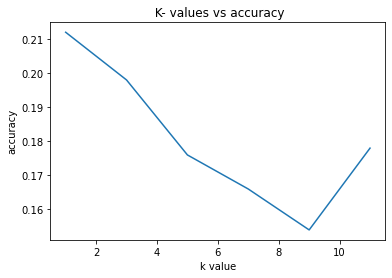

In [ ]:

k=[1,3,5,7,9,11]
y=[acc1,acc2,acc3,acc4,acc5,acc6]

plt.plot(k, y)
plt.title(' K- values vs accuracy')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.show()

Q.3 Compute a Histogram of Oriented Gradients (HOG) for the given image.
    Histogram of Oriented Gradients (HOG) is a feature descriptor widely employed on several domains to characterize objects through their shapes. Local object appearance and shape can often be described by the distribution of local intensity gradients or edge directions.
    Compute the histogram of orientation gradients for the HOG.png(in zip file). Visualize HOG and report your results. Verify your results using inbuilt function
‘ extract HOG Features’ command. Here are the steps for extracting the HOG features from the image.

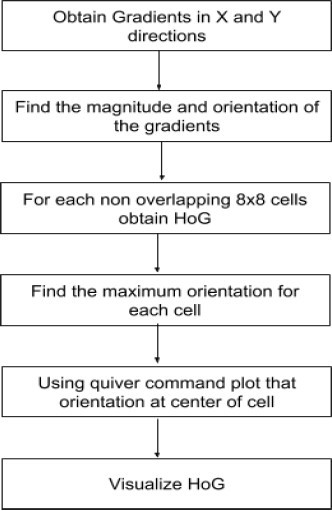



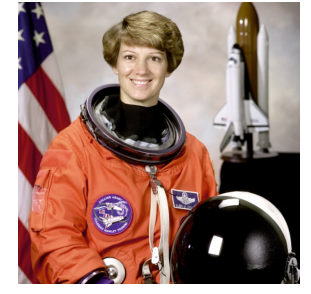

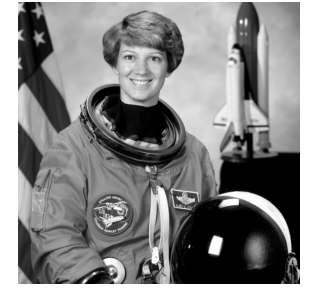

In [6]:
#### Your Code Starts here ###
## Import the necessary packages and read the box.jpg image ###
import numpy as np
import cv2
from google.colab.patches import cv2_imshow


img=cv2.imread('/content/HOG.png')
img1=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(img)
cv2_imshow(img1)


#### Your Code ends here ####

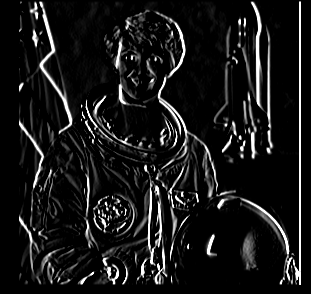

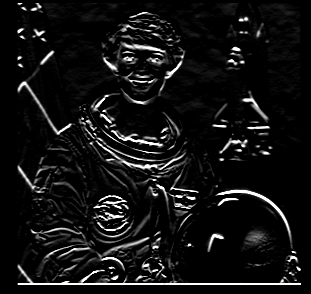

In [7]:
gx = cv2.Sobel(img1,cv2.CV_64F,1,0,ksize=3)
gy = cv2.Sobel(img1,cv2.CV_64F,0,1,ksize=3)

cv2_imshow(gx)
cv2_imshow(gy)


In [8]:
# compute the gradient magnitude and orientation
mag = np.sqrt((gx ** 2) + (gy ** 2))
dir = np.arctan2(gy, gx) * (180 / np.pi) 

dir=abs(np.array(dir))

w,h=dir.shape
w_size=8;
r=(w//w_size)*(h//w_size)

In [9]:
import matplotlib.pyplot as plt
# window size
w_size=8;
# s1=(256,256)
# k1=np.random.randint(0,15,size = (32,16))
k1=dir
k2=mag
# print(k1)

w,h=k1.shape
r=(w//w_size)*(h//w_size)
id=np.zeros((r,2))
r1=np.zeros((r,2))

c1=0
  # c11=0
  # c22=0
  # c33=0
  # c44=0
  # c55=0
  # c66=0
  # c77=0
  # c88=0
  # c99=0


d=w_size//2 
for i in range(0,w,w_size):
  for j in range(0,h,w_size):
    k5=k1[0+i:w_size+i,0+j:w_size+j]
    k6=k2[0+i:w_size+i,0+j:w_size+j]
        
    c11=0
    c22=0
    c33=0
    c44=0
    c55=0
    c66=0
    c77=0
    c88=0
    c99=0
    for p1 in range(k6.shape[0]):
      for p2 in range(k6.shape[1]):
        if k5[p1,p2]>=0 and k5[p1,p2]<=20:
          c11=c11+k6[p1,p2]
        elif k5[p1,p2]>20 and k5[p1,p2]<=40:
          c22=c22+k6[p1,p2]
        elif k5[p1,p2]>40 and k5[p1,p2]<=60:
          c33=c33+k6[p1,p2]
        elif k5[p1,p2]>60 and k5[p1,p2]<=80:
          c44=c44+k6[p1,p2]
        elif k5[p1,p2]>80 and k5[p1,p2]<=100:
          c55=c55+k6[p1,p2]
        elif k5[p1,p2]>100 and k5[p1,p2]<=120:
          c66=c66+k6[p1,p2]
        elif k5[p1,p2]>120 and k5[p1,p2]<=140:
          c77=c77+k6[p1,p2]
        elif k5[p1,p2]>140 and k5[p1,p2]<=160:
          c88=c88+k6[p1,p2]
        elif k5[p1,p2]>160 and k5[p1,p2]<=180:
          c99=c99+k6[p1,p2]
    

    w1,h1=k5.shape
    if w1==w_size and h1==w_size:
      c=np.array([c11,c22,c33,c44,c55,c66,c77,c88,c99])
        # print(c)

        # print(k5)
        #c=plt.hist(k5.ravel(), bins=9)
      
      m=c.max()
      # print(m)
      p111=np.where(c == m)
      
      q1=p111[0]
      p=q1[0]
      # print(p)
      r1[c1,0]=i+4
      r1[c1,1]=j+5

      j=c1
      if p==0:
        id[j,0]=2
        id[j,1]=0
      elif p==1:
        id[j,0]=2
        id[j,1]=1
      elif p==2:
        id[j,0]=2
        id[j,1]=2
      elif p==3:
        id[j,0]=1
        id[j,1]=2
      elif p==4:
        id[j,0]=0
        id[j,1]=2
      elif p==5:
        id[j,0]=-1
        id[j,1]=2
      elif p==6:
        id[j,0]=-2
        id[j,1]=2
      elif p==7:
        id[j,0]=-2
        id[j,1]=1
      elif p==8:
        id[j,0]=-2
        id[j,1]=0
      c1=c1+1
      #print(id)
        





      

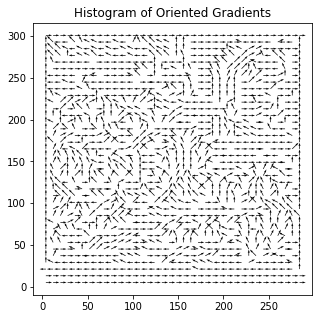

In [10]:

 

# Import libraries
import numpy as np
import matplotlib.pyplot as plt
 
 
# Creating arrow
x_pos = r1[:,0]
y_pos = r1[:,1]
x_direct = id[:,0]
y_direct = id[:,1]
 
# Creating plot
fig, ax = plt.subplots(figsize = (5, 5))
ax.quiver(x_pos, y_pos, x_direct, y_direct, scale=90)
#ax.axis([-20, 20, -20, 20])

 
# show plot
ax.set_title('Histogram of Oriented Gradients')
plt.show()

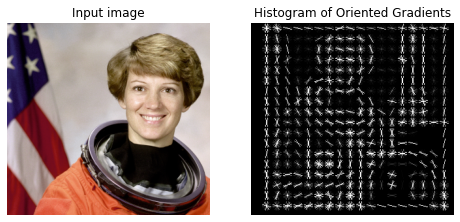

In [11]:
#####################
###################   using inbuilt command    ################

import matplotlib.pyplot as plt

from skimage.feature import hog
from skimage import data, exposure


image = data.astronaut()

fd, hog_image = hog(img, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()